<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Project_3_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load wine dataset

In [2]:
from sklearn.datasets import load_wine
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_edited.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0      yes_es       yes_ec           no_em  
1      yes_es       yes_ec           no_em  
2      yes_es       yes_ec          yes_em  
3      yes_es        no_ec          yes_em  
4      yes_es        no_ec          yes_em  


# Create Dummy Variables

In [3]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes_es,yes_ec,yes_em
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


# Define X & y splits

In [4]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [5]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

# Testing/Training Split

In [6]:
#did a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66, test_size=0.2, stratify=y)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 103 samples.
Testing set has 26 samples.


# PCA

## Import Decision Tree Classifer and run the pre-processed data

Shows only 50% accuracy test on test set but 83% on training

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.83
Accuracy on test set: 0.50


## 95% of Variance Explained

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

# fit on and transforming the training set and then transform the test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Text(0, 0.5, 'Principal components')

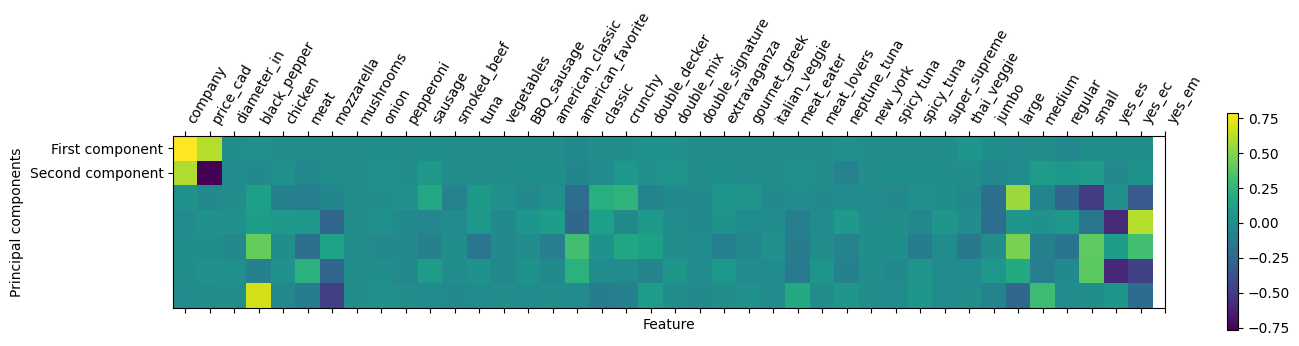

In [9]:
# plot the principal components
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [10]:
model2 = DecisionTreeClassifier(random_state=0).fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(model2.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(model2.score(X_test_pca, y_test)))

Accuracy on training set: 0.83
Accuracy on test set: 0.50


## Test with an SVM

In [11]:
from sklearn.svm import SVC

model3 = SVC().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test, y_test)))

Accuracy on training set: 0.38
Accuracy on test set: 0.38


In [12]:
model4 = SVC().fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(model4.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(model4.score(X_test_pca, y_test)))

Accuracy on training set: 0.41
Accuracy on test set: 0.31


# Scale the Data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# PCA on Unscaled versus Scaled

Accuracy on training set: 0.41
Accuracy on test set: 0.31


Text(0, 0.5, 'Principal components')

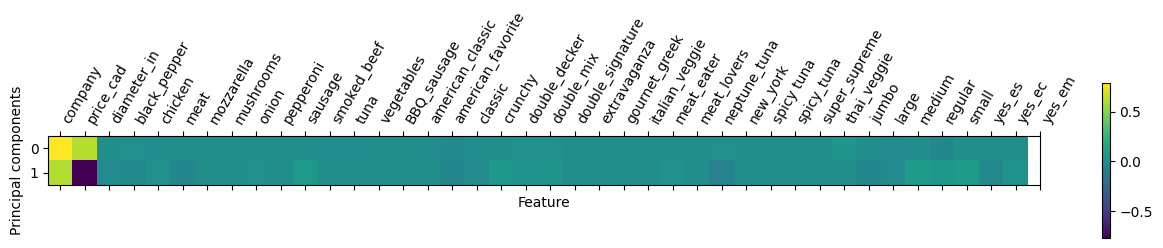

In [14]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

# test on SVM
model5 = SVC().fit(X_train_pca2, y_train)

print("Accuracy on training set: {:.2f}".format(model5.score(X_train_pca2, y_train)))
print("Accuracy on test set: {:.2f}".format(model5.score(X_test_pca2, y_test)))

plt.matshow(pca2.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Accuracy on training set: 0.30
Accuracy on test set: 0.19


Text(0, 0.5, 'Principal components')

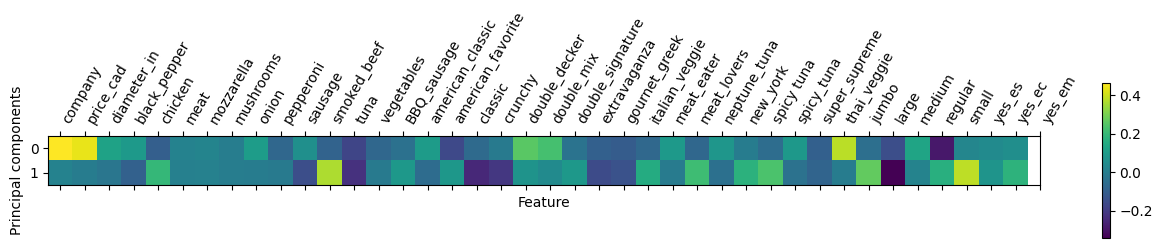

In [15]:
# keep the first two principal components of the data
pca3 = PCA(n_components=2)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca3 = pca3.fit_transform(X_scaled_train)
X_test_pca3 = pca3.transform(X_scaled_test)

# test on SVM
model6 = SVC().fit(X_train_pca3, y_train)

print("Accuracy on training set: {:.2f}".format(model5.score(X_train_pca3, y_train)))
print("Accuracy on test set: {:.2f}".format(model5.score(X_test_pca3, y_test)))

plt.matshow(pca3.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 95% of Variance

Text(0, 0.5, 'Principal components')

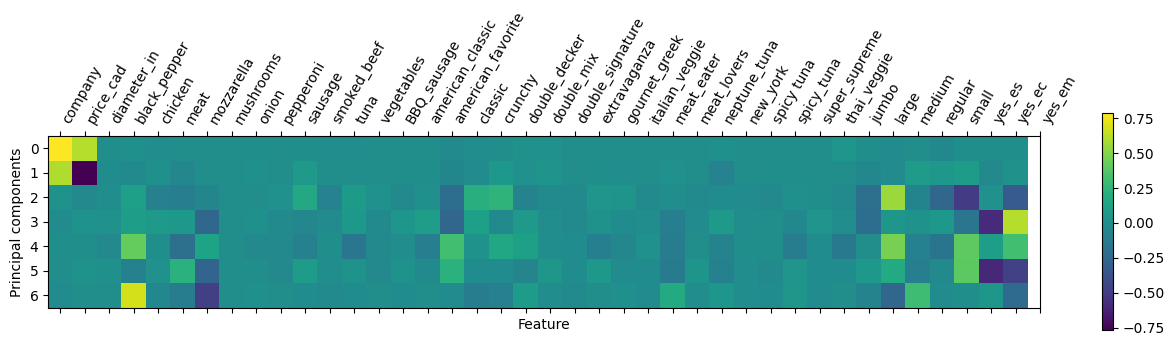

In [16]:
# 95% of the variance
pca4 = PCA(n_components=0.95)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca4 = pca4.fit_transform(X_train)
X_test_pca4 = pca4.transform(X_test)

plt.matshow(pca4.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Principal components')

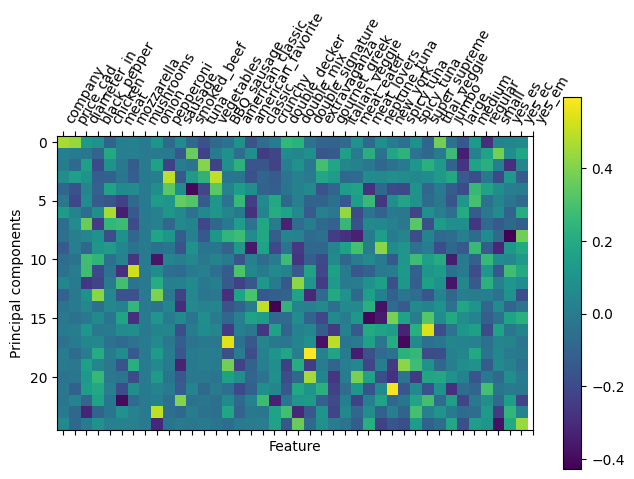

In [17]:
# 95% of the variance
pca5 = PCA(n_components=0.95)

# fit PCA model to training data
# transform data onto the first two principal components
X_train_pca5 = pca5.fit_transform(X_scaled_train)
X_test_pca5 = pca5.transform(X_scaled_test)

plt.matshow(pca5.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# NMF on Unscaled versus Scaled

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Accuracy on training set: 0.38
Accuracy on test set: 0.35


Text(0, 0.5, 'Principal components')

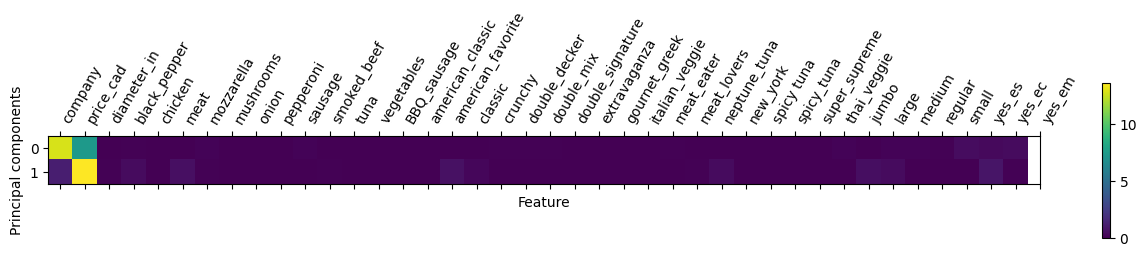

In [18]:
from sklearn.decomposition import NMF
# keep the first two components of the data
nmf1 = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf1 = nmf1.fit_transform(abs(X_train))
X_test_nmf1 = nmf1.transform(abs(X_test))

# evaluate SVM performance
model7 = SVC().fit(X_train_nmf1, y_train)

print("Accuracy on training set: {:.2f}".format(model7.score(X_train_nmf1, y_train)))
print("Accuracy on test set: {:.2f}".format(model7.score(X_test_nmf1, y_test)))

plt.matshow(nmf1.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Accuracy on training set: 0.04
Accuracy on test set: 0.35


Text(0, 0.5, 'Principal components')

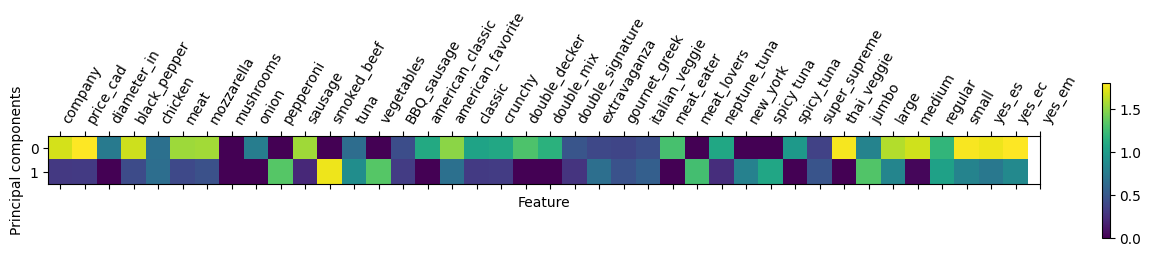

In [19]:
from sklearn.decomposition import NMF
# keep the first two components of the data
nmf2 = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf2 = nmf2.fit_transform(abs(X_scaled_train))
X_test_nmf2 = nmf2.transform(abs(X_scaled_test))

# evaluate SVM performance
model8 = SVC().fit(X_train_nmf1, y_train)

print("Accuracy on training set: {:.2f}".format(model8.score(X_train_nmf2, y_train)))
print("Accuracy on test set: {:.2f}".format(model8.score(X_test_nmf1, y_test)))

plt.matshow(nmf2.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(dataset.columns)),
           dataset.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# TSN versus PCA

In [20]:
# install and load mglearn
! pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.5 MB/s eta 0:00:00


In [24]:
#code doesn't work b/c no dataset.target_names exists
# unscaled

#tsne
# import TSNE
# from sklearn.manifold import TSNE

# # instantiate an instance of TSNE
# tsne1 = TSNE(random_state=42)
# X_tsne1 = tsne1.fit_transform(X_train)

# # plot the first two dimensions
# plt.figure(figsize=(8, 8))
# mglearn.discrete_scatter(X_tsne1[:, 0], X_tsne1[:, 1], y_train)
# plt.legend(dataset.target_names, loc="best")
# plt.gca().set_aspect("equal")
# plt.xlabel("First basis function")
# plt.ylabel("Second basis component")

# # plot the first two dimensions of PCA
# plt.figure(figsize=(8, 8))
# mglearn.discrete_scatter(X_train_pca2 [:, 0], X_train_pca2 [:, 1], y_train)
# plt.legend(dataset.target_names, loc="best")
# plt.gca().set_aspect("equal")
# plt.xlabel("First principal component")
# plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

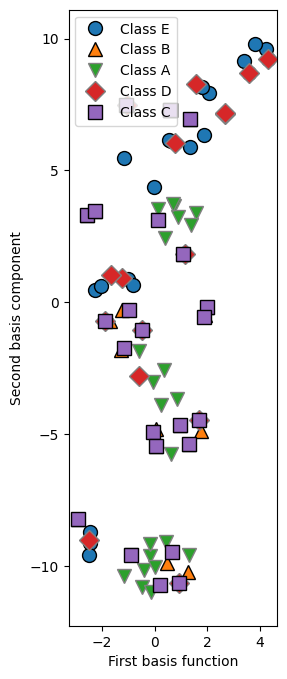

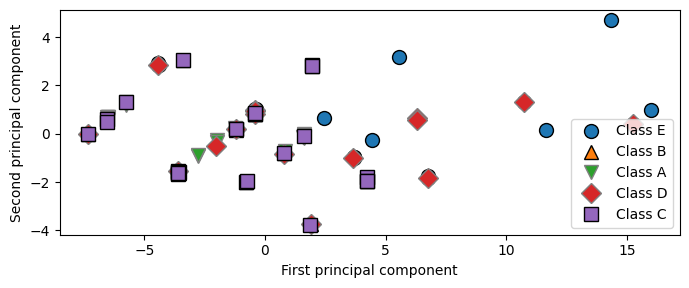

In [23]:
# import TSNE
from sklearn.manifold import TSNE

# instantiate an instance of TSNE
tsne1 = TSNE(random_state=42)
X_tsne1 = tsne1.fit_transform(X_train)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne1[:, 0], X_tsne1[:, 1], y_train)

# Determine the unique labels in y_train
unique_labels = y_train.unique()

# Create a mapping of labels to names (adjust as needed)
target_names = {label: f'Class {label}' for label in unique_labels}
plt.legend([target_names[label] for label in unique_labels], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca2 [:, 0], X_train_pca2 [:, 1], y_train)

# Use the same target name mapping for PCA plot
plt.legend([target_names[label] for label in unique_labels], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

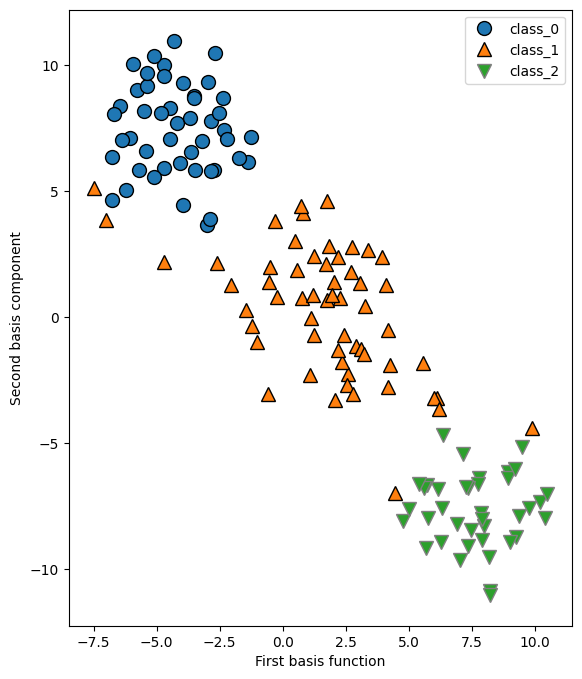

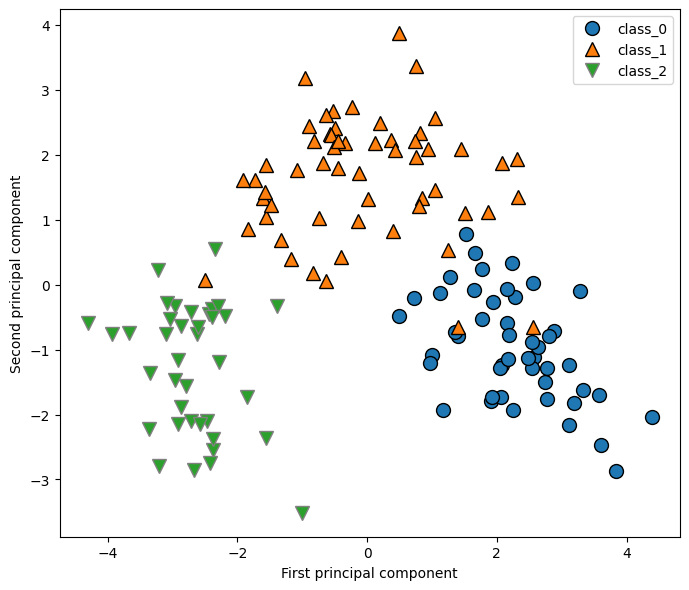

In [ ]:
#original code that doesn't work had to edit it in next cell
# # scaled

# #tsne
# # instantiate an instance of TSNE
# tsne2 = TSNE(random_state=42)
# X_tsne2 = tsne2.fit_transform(X_scaled_train)

# # plot the first two dimensions
# plt.figure(figsize=(8, 8))
# mglearn.discrete_scatter(X_tsne2[:, 0], X_tsne2[:, 1], y_train)
# plt.legend(dataset.target_names, loc="best")
# plt.gca().set_aspect("equal")
# plt.xlabel("First basis function")
# plt.ylabel("Second basis component")

# # plot the first two dimensions of PCA
# plt.figure(figsize=(8, 8))
# mglearn.discrete_scatter(X_train_pca3 [:, 0], X_train_pca3 [:, 1], y_train)
# plt.legend(dataset.target_names, loc="best")
# plt.gca().set_aspect("equal")
# plt.xlabel("First principal component")
# plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

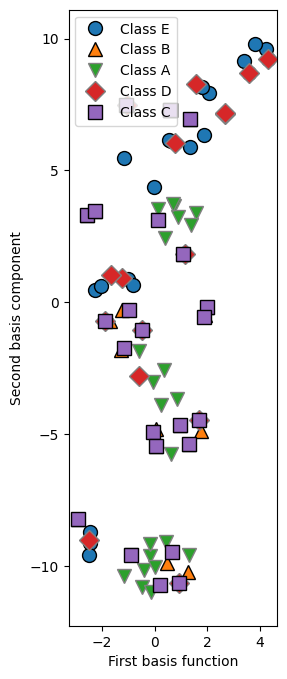

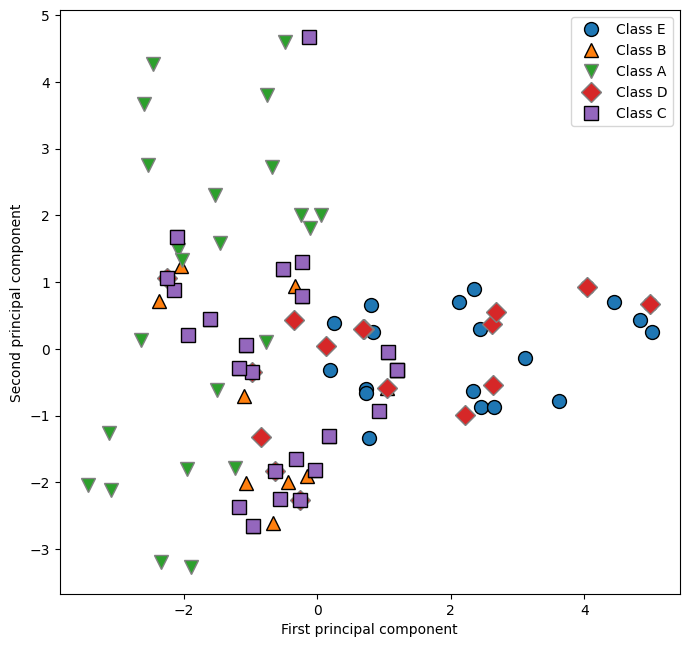

In [25]:
# import TSNE
from sklearn.manifold import TSNE

# instantiate an instance of TSNE
tsne2 = TSNE(random_state=42)
X_tsne2 = tsne2.fit_transform(X_train)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne2[:, 0], X_tsne2[:, 1], y_train)

# Determine the unique labels in y_train
unique_labels = y_train.unique()

# Create a mapping of labels to names (adjust as needed)
target_names = {label: f'Class {label}' for label in unique_labels}
plt.legend([target_names[label] for label in unique_labels], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca3 [:, 0], X_train_pca3 [:, 1], y_train)

# Use the same target name mapping for PCA plot
plt.legend([target_names[label] for label in unique_labels], loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")